In [1]:
#Imnporting libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

#Listing the existing files in the dir
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

code.ipynb
time_series.ipynb
COMMIT_EDITMSG
config
description
HEAD
index
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update.sample
exclude
HEAD
master
master
f1b70eed8c0f58883c67ae94393f5912538e83
87365763a6699abeb78e36b29599108e065542
008e38e53173d537c97cd7f0f4c9095cc2c920
5a164683dab14a2c38acea119d67b93896b80a
42a29f266ab659e685cef3802de3af0e1b61c7
8a1b4139c3977dfd8d9b5554209bbd4b960b64
d781a6be05422435310e54dced2d78362b6282
872ad8190c605e1d9fc59f28d1f79ae53d89f8
a33ca8eed5e64a40f3eba250a9456699bc62a0
381bfa563cb65d2ec3985e03ebaa2359e10a71
9864d8ecfa50c20ab18f5b85d01278e59e7f0b
30de484fef1ecf25afffc168ba3db93f4d7b1a
00ef74bde791d30278d2b5a92735b384c12a8f
1513c0511644910cbc26c17a28a8c879bce210
5b3085f2e9829934c4a12c334426119a375377
16b12baa8b1a948a9e67981adb0454669ad9d7
666c30c1bf494e6cc5450522b02b91518ff2a2
aae65cbb38481bb2bb

In [77]:
#Reading the file
df = pd.read_csv('./files/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [78]:
#Setting up the date to be the index,otherwise time series won't work
df = df.reset_index()
df.head()

,index,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [79]:
#Setting the date to be the new index
df = df.set_index('date')

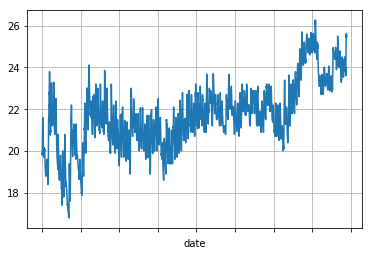

In [80]:
# Plot the entire time series diet and show gridlines
df['T1'].plot(grid = True)
plt.show()

In [64]:
#Rather than calculating corr between actual series on should calculate correlation on their pecentage change to avoid spirious corr.
df_pct = df.pct_change().fillna(0).astype(float).add_suffix('_PCT_CHG')
df_pct.head()
correlation = df_pct[['Windspeed_PCT_CHG','RH_1_PCT_CHG']].corr()
correlation

,Windspeed_PCT_CHG,RH_1_PCT_CHG
Windspeed_PCT_CHG,1.000000,-0.006883
RH_1_PCT_CHG,-0.006883,1.000000


In [81]:
# Convert the date index to datetime
df.index = pd.to_datetime(df.index)
df.head()

,index,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [82]:
# Add a constant to the DataFrame x
x = sm.add_constant(df['T1'])
y = df['T2']

# Fit the regression of y on x
result = sm.OLS(y, x).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                 4.611e+04
Date:                Tue, 06 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:49:48   Log-Likelihood:                -31610.
No. Observations:               19735   AIC:                         6.322e+04
Df Residuals:                   19733   BIC:                         6.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4387      0.116    -38.358      0.0

In [84]:
#Calculating autocorrelation i.e. correlation of a time series with the lagged version of itself
df_resample = df.resample(rule = 'W').last()
df_resample.head()

# Compute the percentage change of prices
df_resample_pct_change = df.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = df_resample['T1'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

#The autocorrelation is positive, thus momentum or trend following.

The autocorrelation of weekly returns is 0.64


[ 1.          0.53366821  0.32570352  0.32688827  0.05145945 -0.04375325
  0.07636527  0.12240646 -0.04922102 -0.17129528 -0.20779902 -0.29387916
 -0.43512994 -0.22674908 -0.09531507 -0.18980779 -0.05143959 -0.05277904
 -0.08815145 -0.03117148]


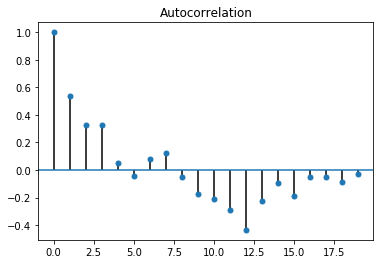

In [87]:
# Compute the acf array of df
acf_array = acf(df['T1'])
print(acf_array)

# Plot the acf function
plot_acf(df['T1'], alpha = 1)
plt.show()

#i.e. strong autocorrelation in 1, 0.5, 0.3, 0.05

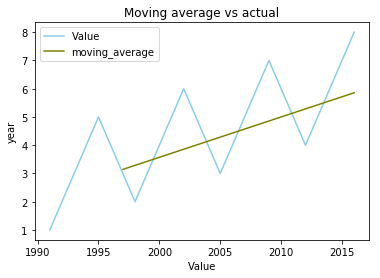

,Value,year,moving_average
0,1,1991,NaN
1,2,1992,NaN
2,3,1993,NaN
3,4,1994,NaN
4,5,1995,NaN
5,4,1996,NaN
6,3,1997,3.142857
7,2,1998,3.285714
8,3,1999,3.428571
9,4,2000,3.571429


In [48]:
#Moving average calculation
sales = [{'year': 1991, 'Value': 1},
{'year': 1992, 'Value': 2},
{'year': 1993, 'Value': 3},
{'year': 1994, 'Value': 4},     
{'year': 1995, 'Value': 5},
{'year': 1996, 'Value': 4},
{'year': 1997, 'Value': 3},  
{'year': 1998, 'Value': 2},
{'year': 1999, 'Value': 3},
{'year': 2000, 'Value': 4},     
{'year': 2001, 'Value': 5},     
{'year': 2002, 'Value': 6},  
{'year': 2003, 'Value': 5},     
{'year': 2004, 'Value': 4},  
{'year': 2005, 'Value': 3},     
{'year': 2006, 'Value': 4},
{'year': 2007, 'Value': 5},     
{'year': 2008, 'Value': 6},  
{'year': 2009, 'Value': 7},     
{'year': 2010, 'Value': 6},
{'year': 2011, 'Value': 5},  
{'year': 2012, 'Value': 4},     
{'year': 2013, 'Value': 5},  
{'year': 2014, 'Value': 6}, 
{'year': 2015, 'Value': 7},  
{'year': 2016, 'Value': 8}           
        ]
df = pd.DataFrame(sales)
df['moving_average'] = df['Value'].rolling(window = 7).mean()
_ = plt.plot( 'year', 'Value', data = df, color='skyblue')
_ = plt.plot('year',  'moving_average', data = df, color='olive')
_ = plt.legend()
_= plt.title('Moving average vs actual')
_= plt.xlabel('Value')
_= plt.ylabel('year')
plt.show()
df

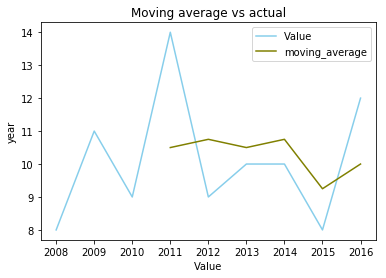

,Value,year,moving_average
0,8,2008,NaN
1,11,2009,NaN
2,9,2010,NaN
3,14,2011,10.50
4,9,2012,10.75
5,10,2013,10.50
6,10,2014,10.75
7,8,2015,9.25
8,12,2016,10.00


In [52]:
sales = [{'year': 2008, 'Value': 8},
{'year': 2009, 'Value': 11},
{'year': 2010, 'Value': 9},
{'year': 2011, 'Value': 14},
{'year': 2012, 'Value': 9},
{'year': 2013, 'Value': 10},  
{'year': 2014, 'Value': 10},
{'year': 2015, 'Value': 8},    
{'year': 2016, 'Value': 12}]   
df = pd.DataFrame(sales)
df['moving_average'] = df['Value'].rolling(window = 4).mean()
_ = plt.plot( 'year', 'Value', data = df, color='skyblue')
_ = plt.plot('year',  'moving_average', data = df, color='olive')
_ = plt.legend()
_= plt.title('Moving average vs actual')
_= plt.xlabel('Value')
_= plt.ylabel('year')
plt.show()
df

In [ ]:
#Loading the data
df = pd.read_csv('./files/forecast.csv')
df = df.reset_index()
df = df.set_index('EST_DPTR_D')
#plotting the data
df['TEU'].plot(grid = True)
plt.show()
#Changing the index to the datetime forma
df.index = pd.to_datetime(df.index)
df_resample = df.resample(rule = 'W').sum()
df_resample.head()
df.columns[0] = 'New_ID'
df['New_ID'] = df.index + 1
df.head()

In [ ]:
fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(-0.7468153584290134, 14)